In [5]:
import numpy
import pystore

from datetime import *
import os
import os.path

import pandas as pd
from dataclasses import make_dataclass


storepath = "../store"
print("using store at " + storepath) 
if not os.path.exists(storepath):
    os.mkdir(storepath)

pystore.set_path(storepath)
store = pystore.store('serre_store')

# Access a collection (create it if not exist)
collection = store.collection('serre')
SerreData = make_dataclass("SerreData", [("TIME", datetime), ("TEMPERATURE", float), ("LIGHT", float), 
          ("HUMIDITY", float), ("SOIL", float), ("LIGHTCMD", int)])

# read collection
readdf = collection.item("serre")
print(readdf.data.loc[(datetime.now() - timedelta(hours=3)):].compute().agg( {'SOIL':['mean','std'], 'LIGHT': ['min','max','mean'], 'HUMIDITY':['min','max','mean','std']}))
print(readdf.data.loc[(datetime.now() - timedelta(days=5)):].compute().agg( {'SOIL':['mean','std','min','max'],  'LIGHT':['min','max','mean'], 'HUMIDITY':['min','max','mean','std']}))



using store at ../store
            SOIL        LIGHT   HUMIDITY
mean  517.540511   607.693119  91.518812
std    43.142286          NaN  13.610443
min          NaN   164.000000  65.200000
max          NaN  1012.000000  99.900000
            SOIL        LIGHT   HUMIDITY
mean  449.817431   893.430936  99.472459
std    42.496441          NaN   3.248174
min   364.000000   116.000000  65.200000
max   595.000000  1023.000000  99.900000


In [6]:
keymetrics = readdf.data[['LIGHT', 'LIGHTCMD', 'HUMIDITY', 'TEMPERATURE', 'SOIL', 'TIME']].resample('15min').mean().compute()

,LIGHT
2021-05-22 16:15:00,851.555556
2021-05-22 16:30:00,649.655556
2021-05-22 16:45:00,707.433333
2021-05-22 17:00:00,548.877778
2021-05-22 17:15:00,739.600000
...,...
2021-05-27 20:00:00,947.377778
2021-05-27 20:15:00,963.622222
2021-05-27 20:30:00,979.911111
2021-05-27 20:45:00,996.811111


In [7]:
keymetrics = keymetrics.dropna()

<AxesSubplot:>

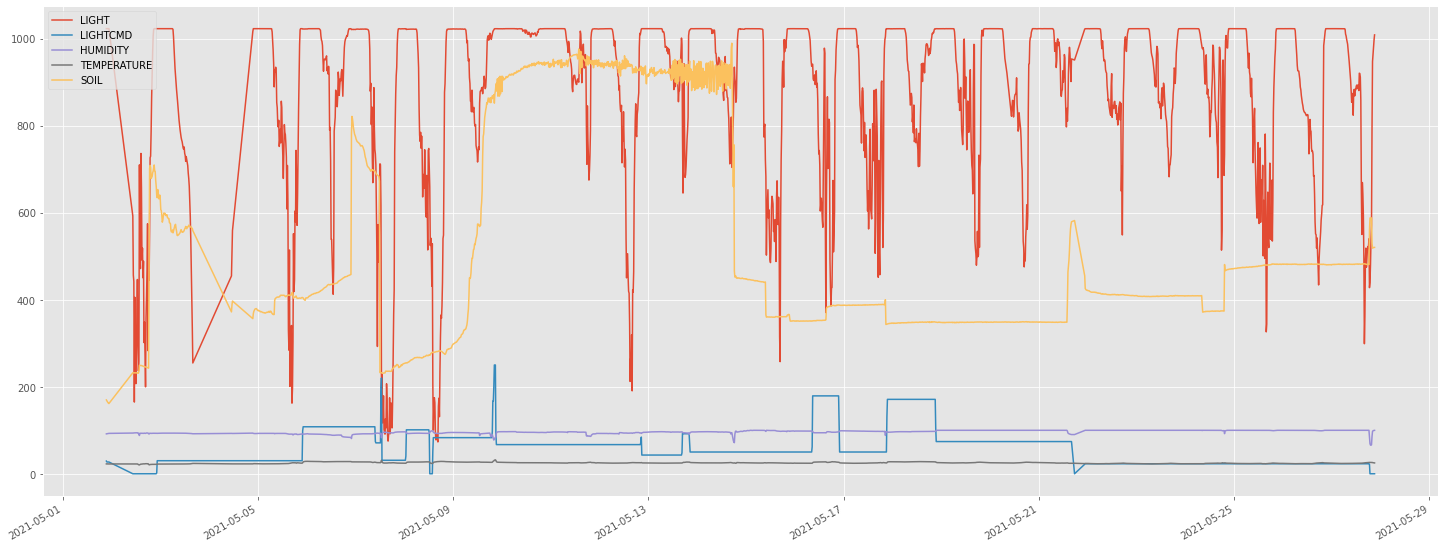

In [8]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")

keymetrics.plot(figsize=(25,10))

In [9]:
onlylight = keymetrics[["LIGHT"]]
onlylight

,LIGHT
2021-05-01 21:30:00,1023.000000
2021-05-01 21:45:00,1023.000000
2021-05-01 22:00:00,1022.966667
2021-05-01 22:15:00,1022.988889
2021-05-01 22:30:00,1023.000000
...,...
2021-05-27 20:00:00,947.377778
2021-05-27 20:15:00,963.622222
2021-05-27 20:30:00,979.911111
2021-05-27 20:45:00,996.811111


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(onlylight, period=24*4)

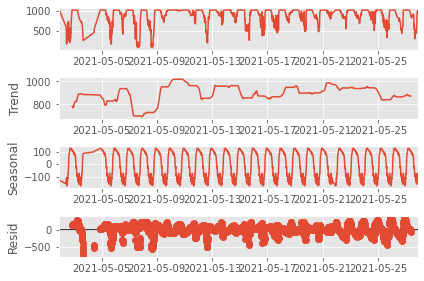

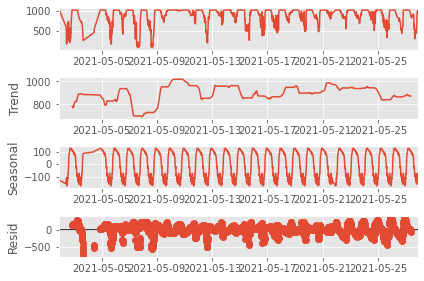

In [11]:
result.plot()

<AxesSubplot:>

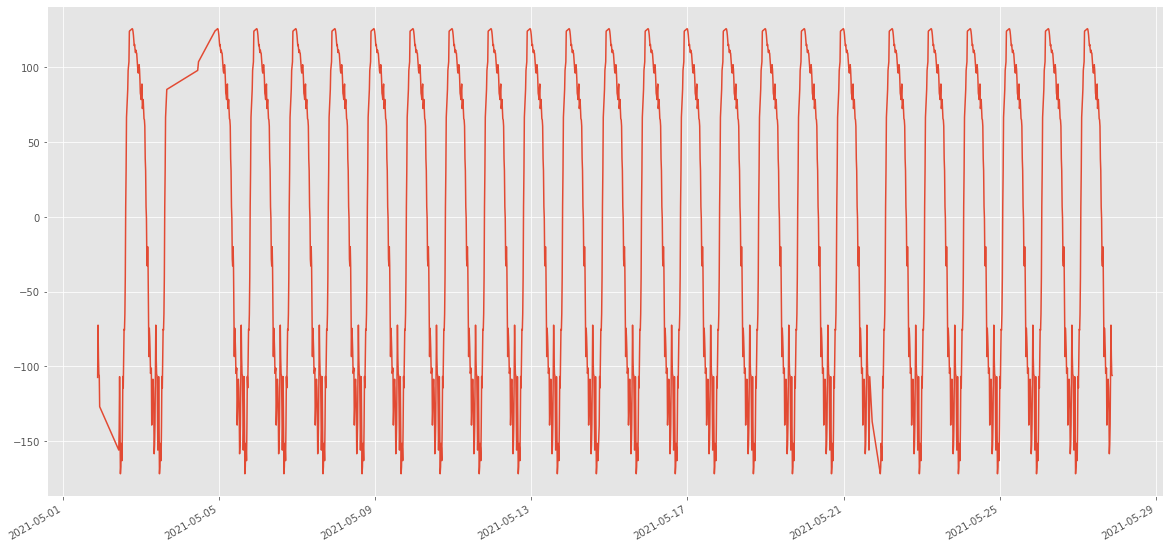

In [12]:
result.seasonal.plot(figsize=(20,10))

<AxesSubplot:>

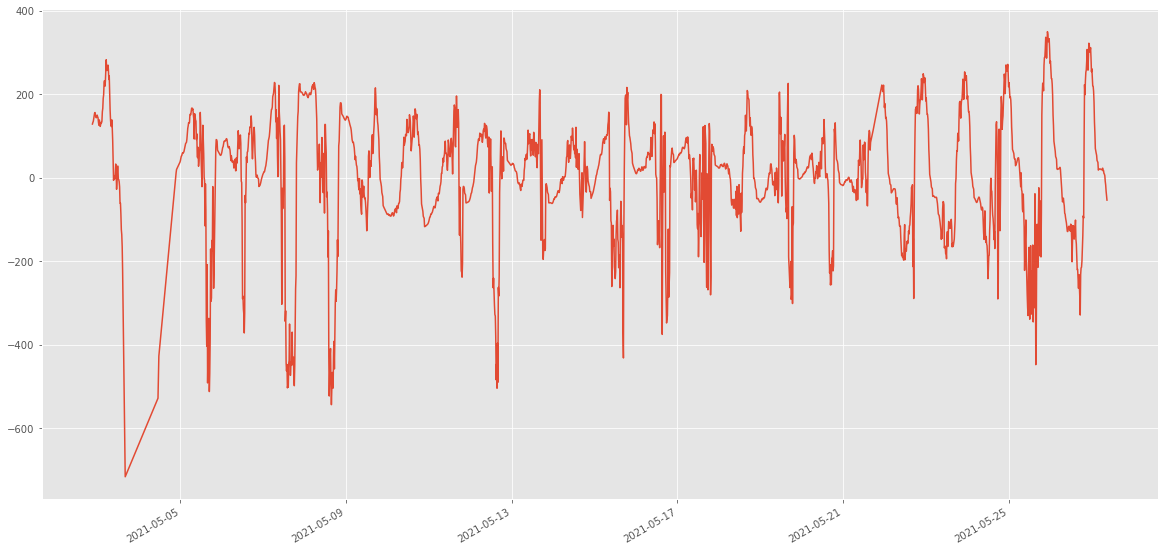

In [13]:
result.resid.plot(figsize=(20,10))